In [7]:
import torch
from matplotlib import pyplot as plt

In [20]:
import numpy as np
import cv2

In [686]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [65]:
def draw_box(frame, bbox, color=(255,0,0)):
    x1, y1, x2, y2 = bbox
    cv2.rectangle(frame, pt1=(x1, y1), pt2=(x2, y2), color=color, thickness=1)
    return frame

In [532]:
 # np.linspace(0,1,1001)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


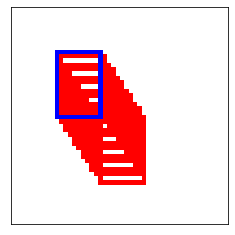

In [599]:
xl, yl = 10, 10

ious = []
for w in [10]: #range(10, 51, 5):
   for h in [15]:#range(10, 51, 5): 
        xr, yr = xl+w, yl+h
        
        img = np.ones((50,50,3))
        box = xl, yl, xr, yr
        draw_box(img, box, color=(0,0,255))

        iou = []
        for offset in np.linspace(0,1,11): #range(1,min(w, h)+10,2):
            # offset_w, offset_h = p
            new_box = [xl+ offset * w, yl+ offset*h, xr + offset*w , yr + offset*h]
            # new_box = [xl+ offset * w, yl, xr + offset*w , yr]            
            # new_box = [xl+ offset * w, yl, xr + offset*w , yr]            
            new_box = list(map(lambda x:int(x), new_box))
            # print(new_box)
            draw_box(img, new_box, color=(255,0,0))
            iou.append(bb_intersection_over_union(box, new_box))
        
        draw_box(img, box, color=(0,0,255))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])        
        plt.show()
        
        ious.append(iou)
        


In [585]:
int(new_box)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

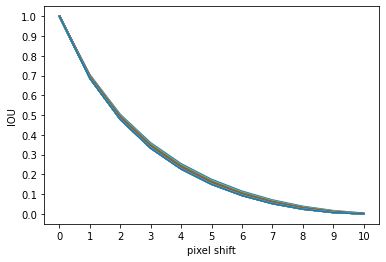

In [559]:
for k in ious:
    plt.plot(k)
    
plt.xticks(range(11))
plt.xlabel('pixel shift')
plt.ylabel('IOU')
plt.yticks(np.arange(0,1.1,.1))    
# plt.suptitle(f'          {data_source} Boxes  &  {perturbation.title()} Perturbation', fontweight ="bold")

# plt.grid(True)
plt.show()    

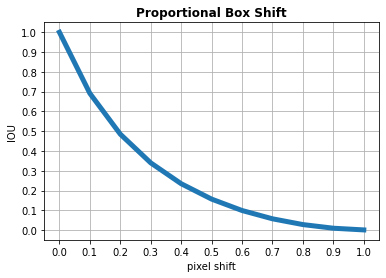

In [575]:
avg = np.array(ious).mean(axis=0)
plt.plot(avg, lw = 5)

plt.xlabel('pixel shift')
plt.ylabel('IOU')
plt.yticks(np.arange(0,1.1,.1))    
plt.xticks(np.arange(0,11,1), [i/10 for i in range(11)])    
plt.title('Proportional Box Shift', fontweight ="bold")

plt.grid(True)

plt.show()    

In [564]:
np.arange(0,1.1,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [565]:
np.arange(0,11,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


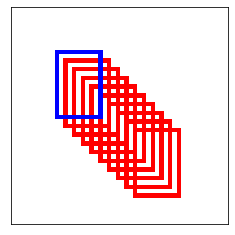

In [604]:
xl, yl = 10, 10

ious = []
for w in [10]:#range(10, 41, 10):
   for h in [15]:#range(10, 41, 10): 
        xr, yr = xl+w, yl+h
        
        img = np.ones((50,50,3))
        box = xl, yl, xr, yr
        draw_box(img, box, color=(0,0,255))

        iou = []
        for offset in range(0,20,2): # np.linspace(0,1,101): #range(1,min(w, h)+10,2):
            # offset_w, offset_h = p
            new_box = [xl+ offset, yl+ offset, xr + offset , yr + offset]
            # new_box = [xl+ offset, yl, xr + offset , yr]
            # new_box = [xl, yl+ offset, xr, yr + offset]
            
            # print(new_box)
            draw_box(img, new_box, color=(255,0,0))
            iou.append(bb_intersection_over_union(box, new_box))

        draw_box(img, box, color=(0,0,255))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])        
        plt.show()
        
        ious.append(iou)
        


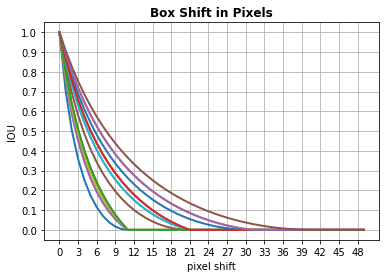

In [581]:
for k in ious:
    plt.plot(k, lw = 2)
    
plt.xlabel('pixel shift')
plt.ylabel('IOU')
plt.yticks(np.arange(0,1.1,.1))    
plt.xticks(np.arange(0,51,3), [i for i in range(0,51,3)])    
plt.title('Box Shift in Pixels', fontweight ="bold")

plt.grid(True)

plt.show()        

In [432]:
from pycocotools.coco import COCO

In [433]:
# pip install pycocotools

In [434]:
from pycocotools.cocoeval import COCOeval

In [435]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
# !pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

--2022-06-18 18:19:48--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.137.113
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.137.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  4.36MB/s    in 54s     

2022-06-18 18:20:42 (4.48 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [438]:
ls annotations

captions_train2017.json          instances_val2017.json
captions_val2017.json            person_keypoints_train2017.json
instances_train2017.json         person_keypoints_val2017.json


In [ ]:
with open('./annotations/instances_val2017.json', 'r') as f:                              
    annt = json.load(f)

coco = COCO('./annotations/instances_val2017.json')
    

In [485]:
directions = [(1,1), (-1,-1), (1,0), (0,1), (-1,0), (0,-1)]

In [486]:
import random

In [497]:
(0, -1)*2

(0, -1, 0, -1)

In [688]:
import json

directions = [(1,1), (-1,-1), (1,0), (0,1), (-1,0), (0,-1), (1,-1), (-1,1)]

directions = [(1,1)]

for offset in range(10):
    res_annt = []
    
    for item in annt['annotations']:
        d = dict()
        
        # shifting
        # offset_x, offset_y = random.sample(directions,1)[0]
        # offset_x, offset_y = offset_x * offset, offset_y * offset
    
    
        # scaling only shifting the right point diagonaly up; lowering width and height
        offset_x, offset_y = random.sample(directions,1)[0]
        offset_x, offset_y = offset_x * offset, offset_y * offset
    
        
        xl, yl, xr, yr = item['bbox']
        # d['bbox'] = [xl+offset, yl+offset, xr+offset, yr+offset]
        # d['bbox'] = [xl, yl+offset, xr, yr+offset]
        # d['bbox'] = [xl+offset, yl, xr+offset, yr]        
        # d['bbox'] = [xl+offset_x, yl+offset_y, xr+offset_x, yr+offset_y]
        
        # enlarging
        # d['bbox'] = [xl, yl, xr+offset_x, yr+offset_y]        
        
        # shrinking
        d['bbox'] = [xl, yl, xr-offset_x, yr-offset_y]        
        
        
        d['image_id'] = item['image_id']
        d['category_id'] = item['category_id']    
        d['score'] = 1
        res_annt.append(d)

    with open('./res_annt.json', 'w') as f:                              
        json.dump(res_annt,f)


    with open('./res_annt.json', 'r') as f:                              
        results = json.load(f)

    # ret = {}

    cocoDt = coco.loadRes(results)
    cocoEval = COCOeval(coco, cocoDt, 'bbox')
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()

Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=7.14s).
Accumulating evaluation results...
DONE (t=1.15s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.563
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.976
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

{'bbox': [9, 25, 630, 397], 'image_id': 250282, 'category_id': 1, 'score': 1}

In [473]:
# results[0]

In [478]:
# diagonal 45 deg



SyntaxError: invalid syntax (47456795.py, line 1)

[0, 34, 639, 388]

In [503]:
# model_res

In [501]:
with open('./detectors_val_results_coco.bbox.json', 'r') as f:                              
    model_res = json.load(f)


In [691]:
directions = [(1,1), (-1,-1), (1,0), (0,1), (-1,0), (0,-1), (1,-1), (-1,1)]
directions = [(1,1)]
# directions = [(-1,1)]

for offset in range(10):
    res_annt = []
    
    for item in model_res:
        d = dict()
        
        offset_x, offset_y = random.sample(directions,1)[0]
        offset_x, offset_y = offset_x * offset, offset_y * offset
    
        
        xl, yl, xr, yr = item['bbox']
        # d['bbox'] = [xl+offset, yl+offset, xr+offset, yr+offset]
        # d['bbox'] = [xl, yl+offset, xr, yr+offset]
        # d['bbox'] = [xl+offset, yl, xr+offset, yr]        
        # d['bbox'] = [xl+offset_x, yl+offset_y, xr+offset_x, yr+offset_y]
        
        
        # enlarging
        # d['bbox'] = [xl, yl, xr+offset_x, yr+offset_y]        
        
        # shrinking
        d['bbox'] = [xl, yl, xr-offset_x, yr-offset_y]        
        
        
        d['image_id'] = item['image_id']
        d['category_id'] = item['category_id']    
        d['score'] = item['score']    
        
        res_annt.append(d)

    with open('./model_res.json', 'w') as f:                              
        json.dump(res_annt,f)


    with open('./model_res.json', 'r') as f:                              
        results = json.load(f)

    # ret = {}



    cocoDt = coco.loadRes(results)
    cocoEval = COCOeval(coco, cocoDt, 'bbox')
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()

Loading and preparing results...
DONE (t=0.25s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=20.64s).
Accumulating evaluation results...
DONE (t=4.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.491
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.677
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.534
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.299
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.530
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.652
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.612
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.647
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

In [657]:
boxA

[285.4493408203125, 260.3983917236328, 28.300750732421875, 27.726303100585938]

In [685]:
boxA = list(map(lambda x:int(x), d['bbox']))
xl, yl, w, h = boxA
xr, yr = xl + w, yl + h

k = 10
print(bb_intersection_over_union([xl, yl, xr, yr] , [xl, yl + k, xr, yr - k] )[1]) # shrinks
print(bb_intersection_over_union([xl, yl, xr, yr] , [xl, yl - k, xr, yr + k] )[1])

print(bb_intersection_over_union([xl, yl, xr, yr] , [xl, yl + k, xr, yr - k] )[0])
print(bb_intersection_over_union([xl, yl, xr, yr] , [xl, yl - k, xr, yr + k] )[0])

232
1392
0.2857142857142857
0.5833333333333334


In [675]:
boxA

[285, 260, 28, 27]

In [668]:
boxB

[285, 260, 28, 27]